In [1]:
%%capture
!pip install tensorflow_gpu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/My Drive/energy_forecast_chile")

In [ ]:
!pip install pandas

In [1]:
%matplotlib inline
import pandas as pd 
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import LSTM_CNN as lx
from os import environ

environ["PYTHONDONTWRITEBYTECODE"] = "1"

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
input_file = 'data/chilectra.csv'
df = pd.read_csv(input_file)
#df = df.iloc[-10*8760:]

In [5]:
input_train, output_train, input_test, output_test, mean, std = lx.get_train_test(df["load"], 168, 24, 8760)

In [6]:
model = lx.train_model(input_train, output_train, epochs=50, train=True, dropout=0.3, batch_size=1000)

Epoch 1/50
43/43 [==============================] - 250s 6s/step - loss: 0.8307 - val_loss: 0.4162

Epoch 00001: val_loss improved from inf to 0.41616, saving model to checkpoints/Weights.hdf5
Epoch 2/50
43/43 [==============================] - 239s 6s/step - loss: 0.4698 - val_loss: 0.4006

Epoch 00002: val_loss improved from 0.41616 to 0.40065, saving model to checkpoints/Weights.hdf5
Epoch 3/50
43/43 [==============================] - 247s 6s/step - loss: 0.3513 - val_loss: 0.3981

Epoch 00003: val_loss improved from 0.40065 to 0.39807, saving model to checkpoints/Weights.hdf5
Epoch 4/50
43/43 [==============================] - 235s 5s/step - loss: 0.2634 - val_loss: 0.3845

Epoch 00004: val_loss improved from 0.39807 to 0.38447, saving model to checkpoints/Weights.hdf5
Epoch 5/50
43/43 [==============================] - 245s 6s/step - loss: 0.2027 - val_loss: 0.3681

Epoch 00005: val_loss improved from 0.38447 to 0.36812, saving model to checkpoints/Weights.hdf5
Epoch 6/50
43/43 [=

In [7]:
pred = lx.model_predict(model, input_test, mean, std)

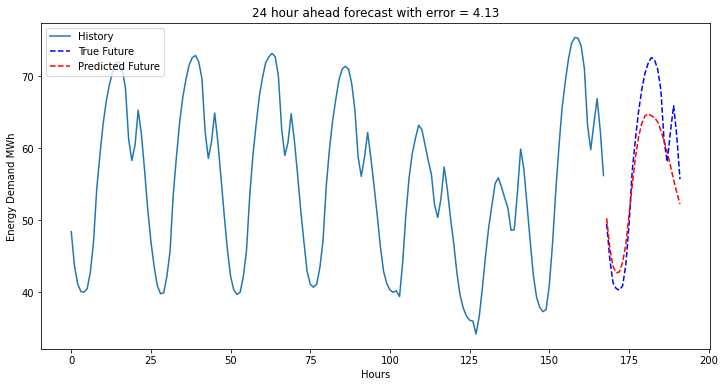

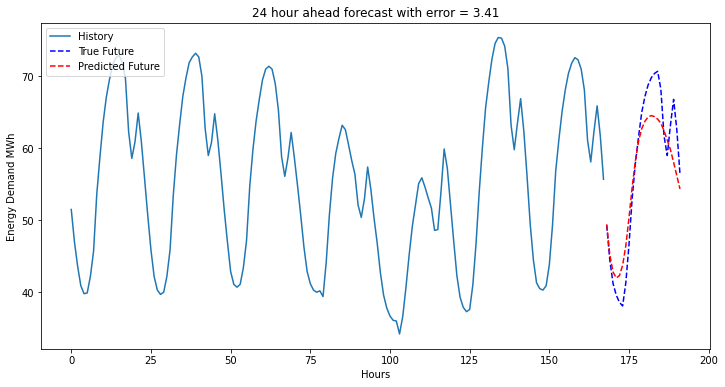

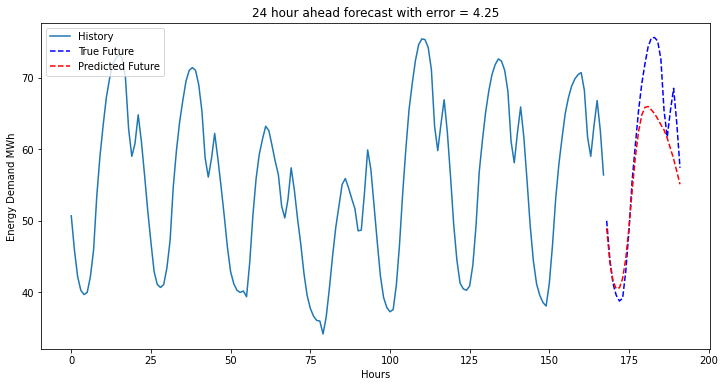

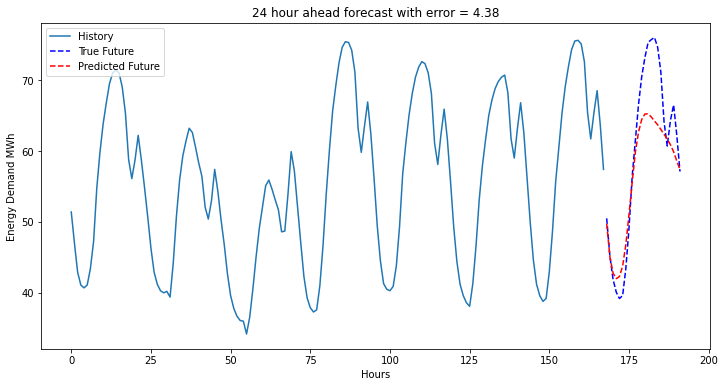

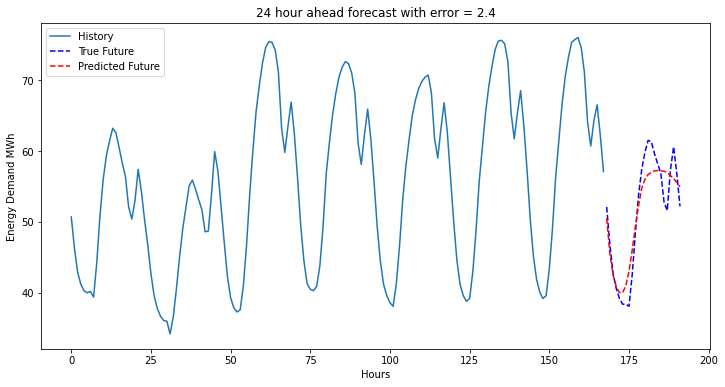

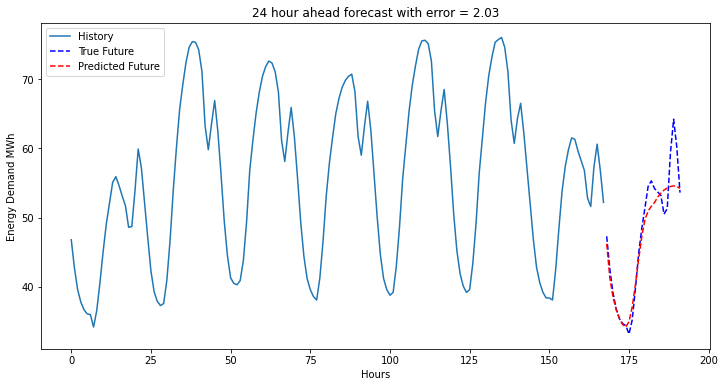

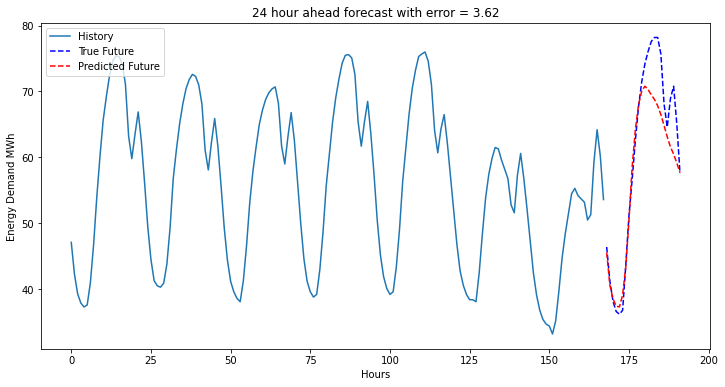

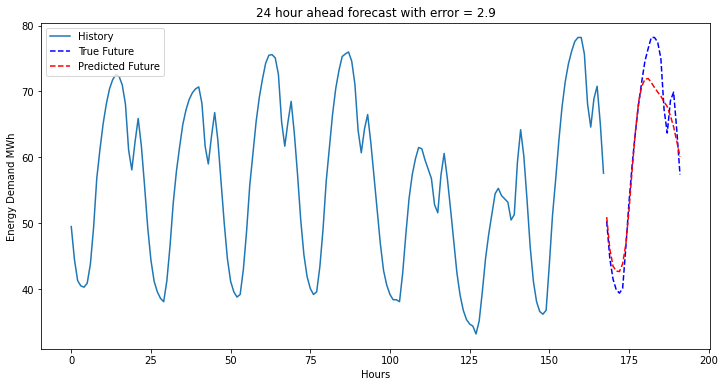

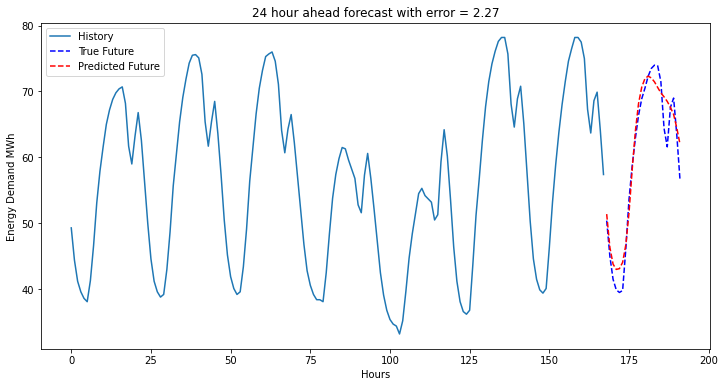

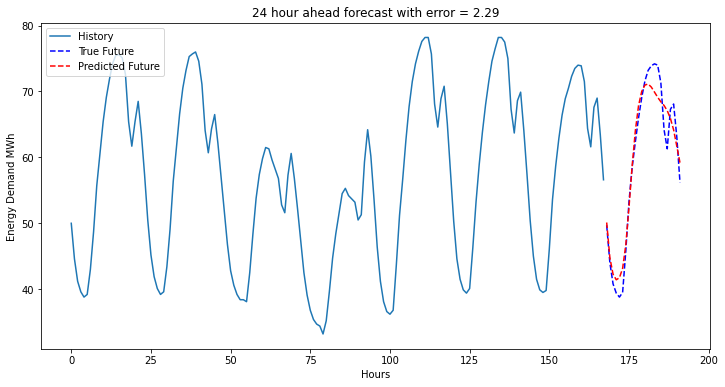

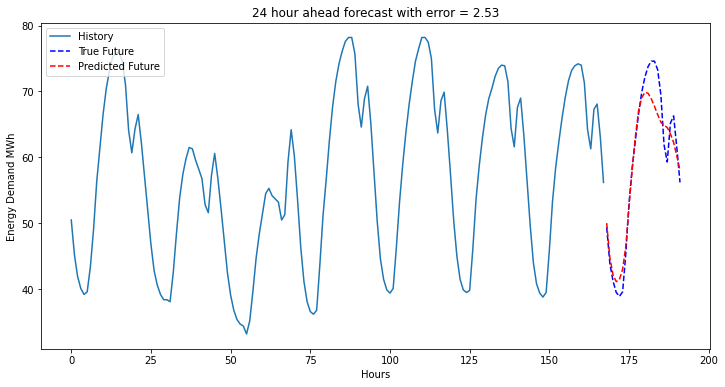

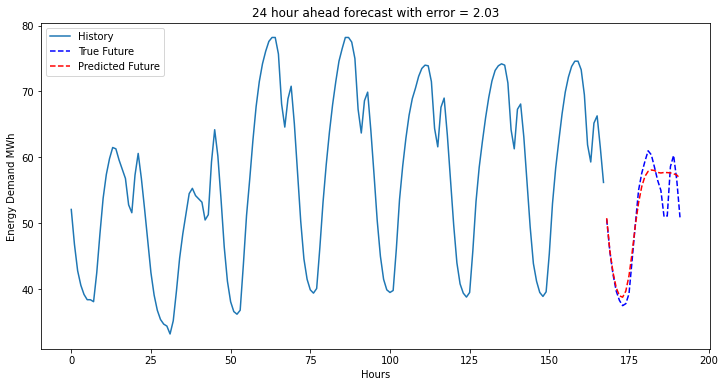

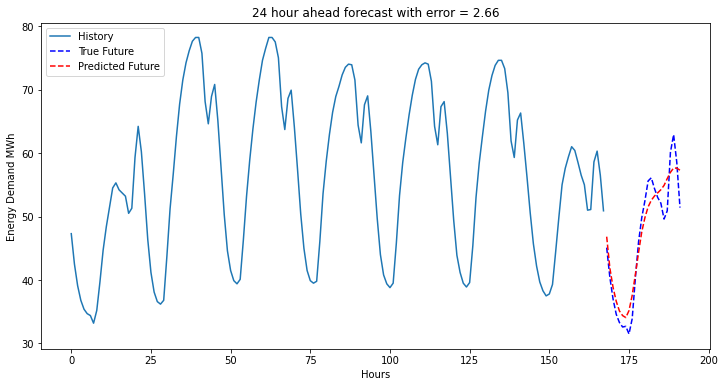

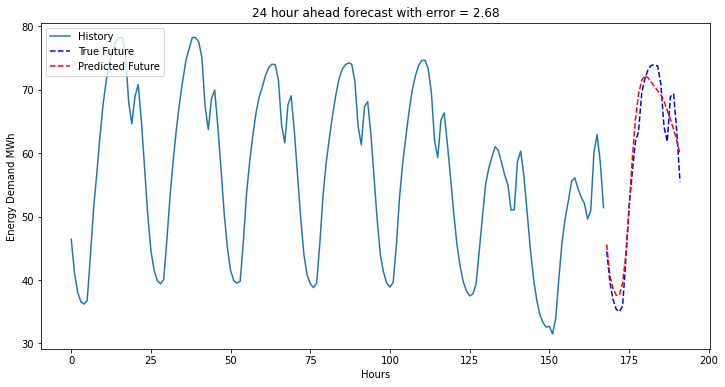

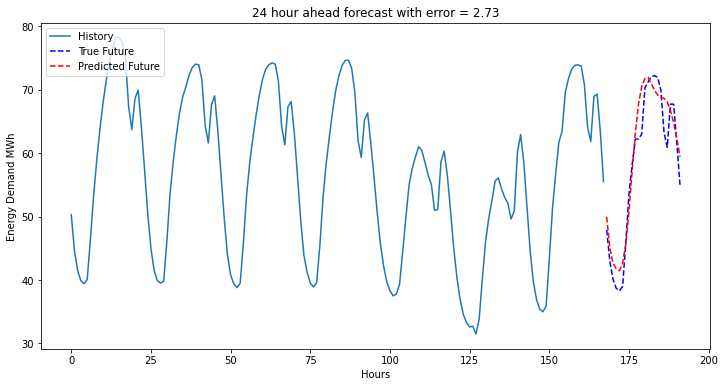

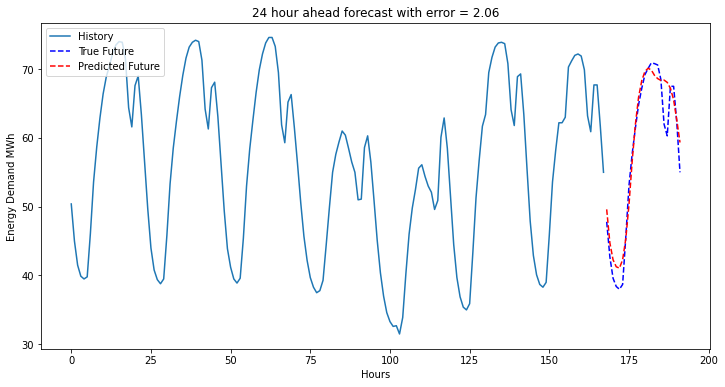

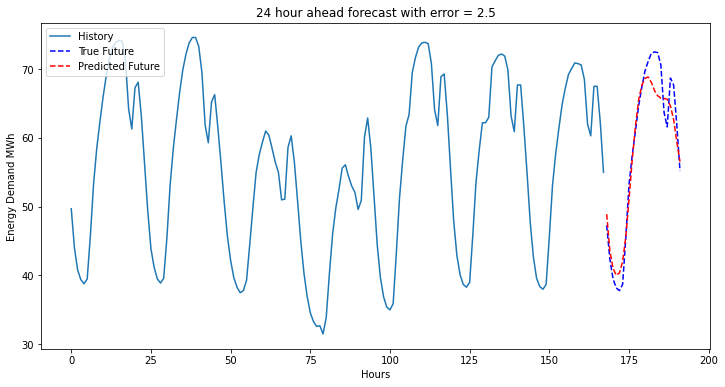

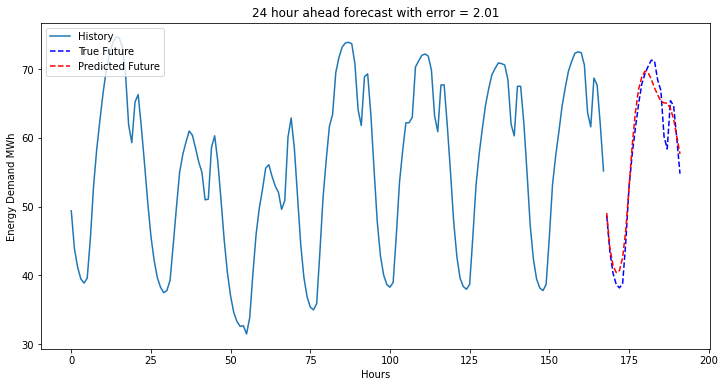

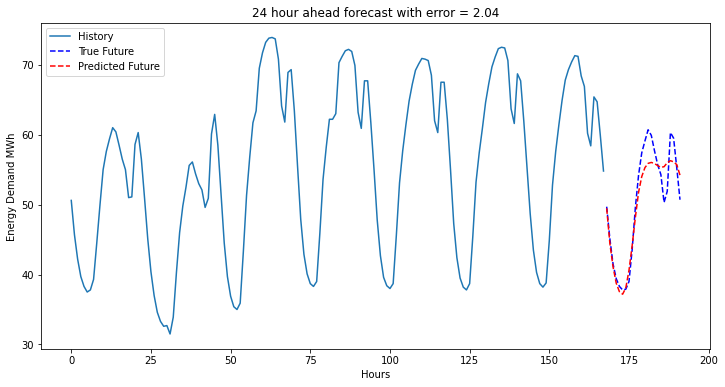

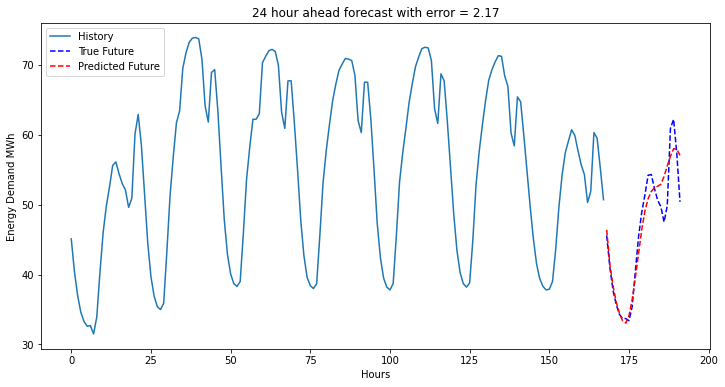

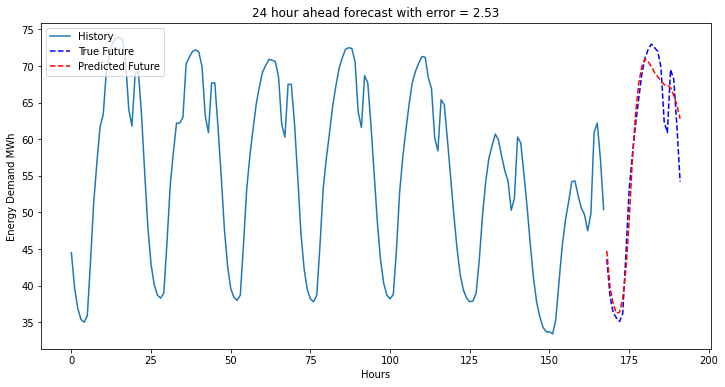

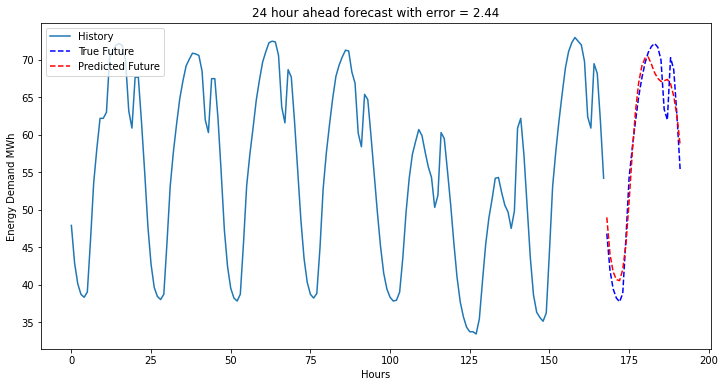

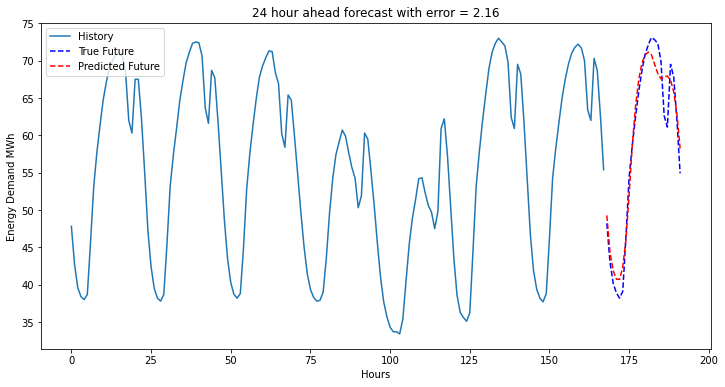

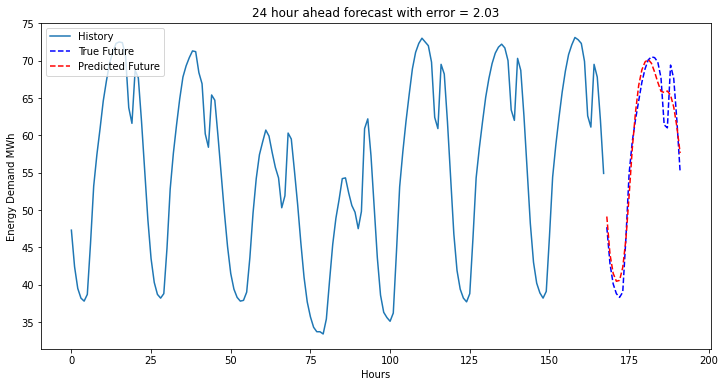

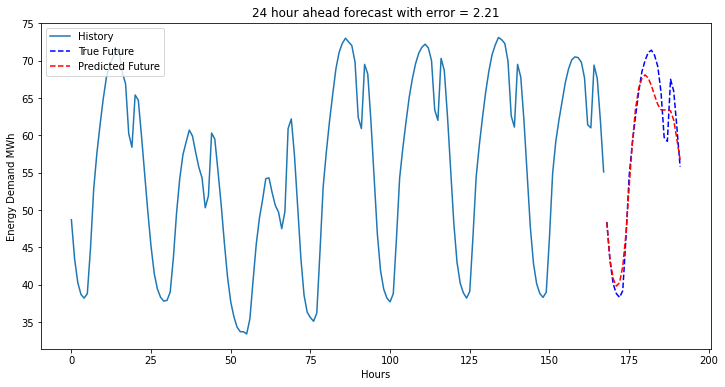

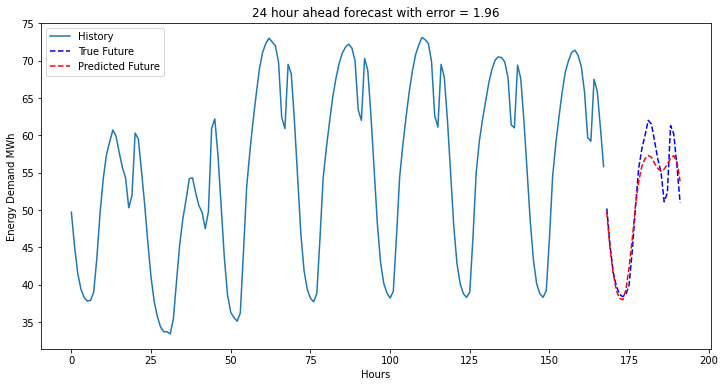

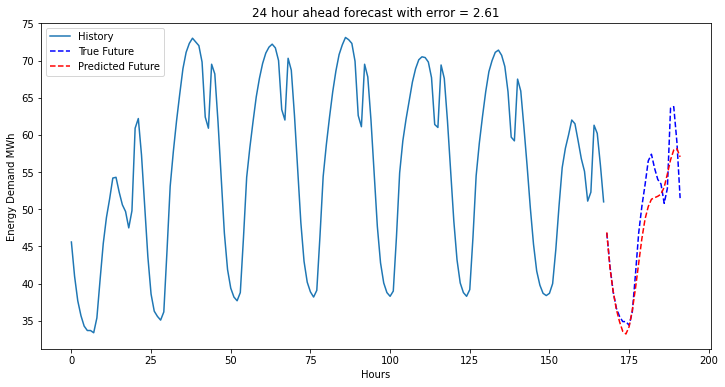

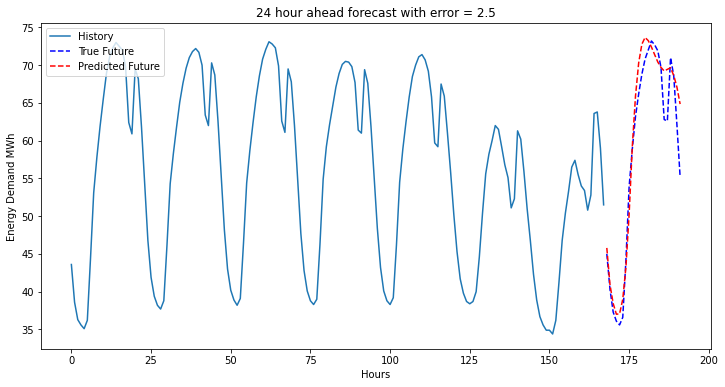

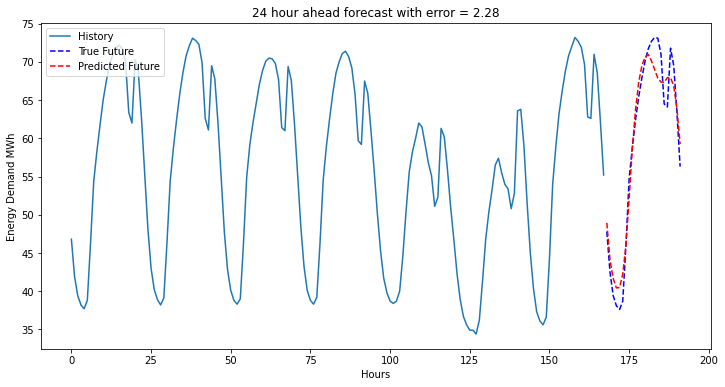

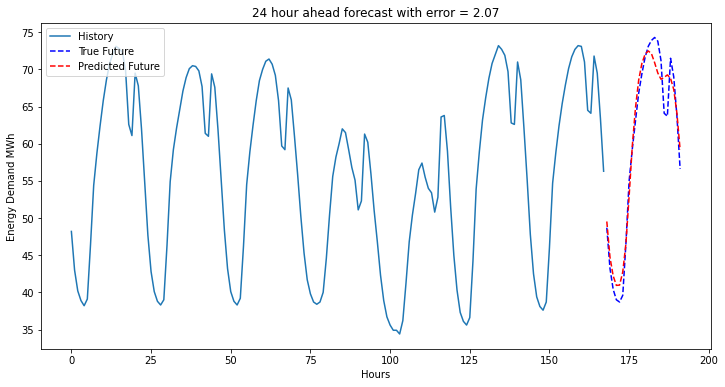

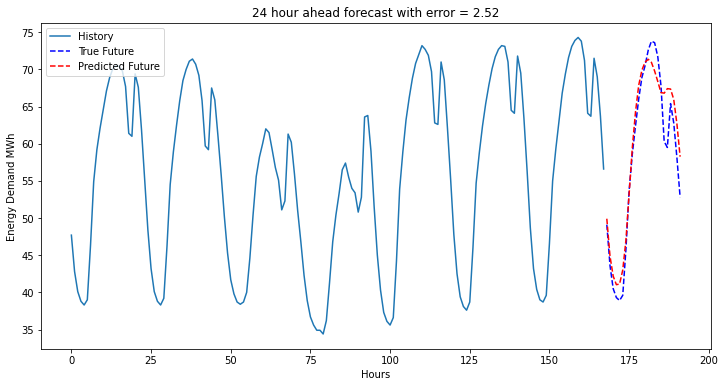

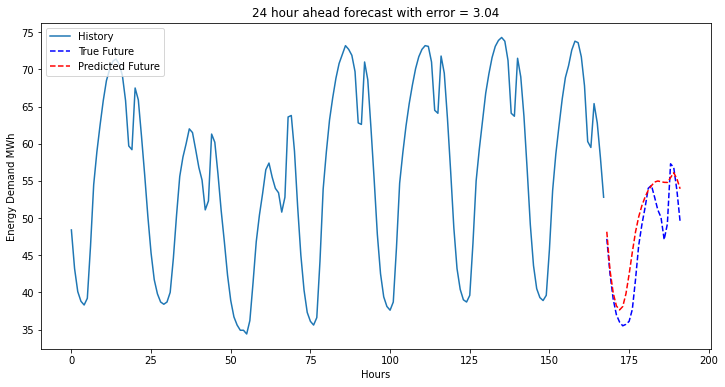

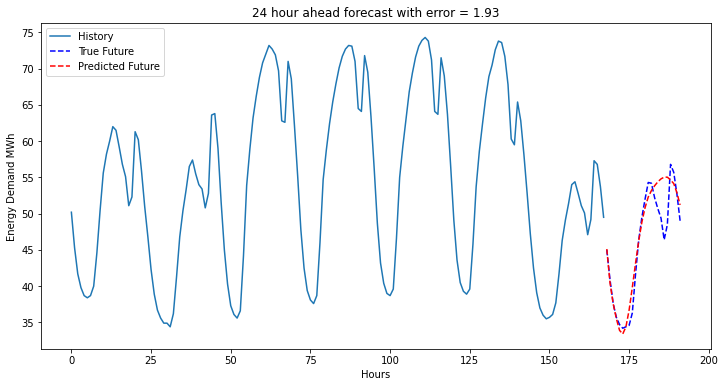

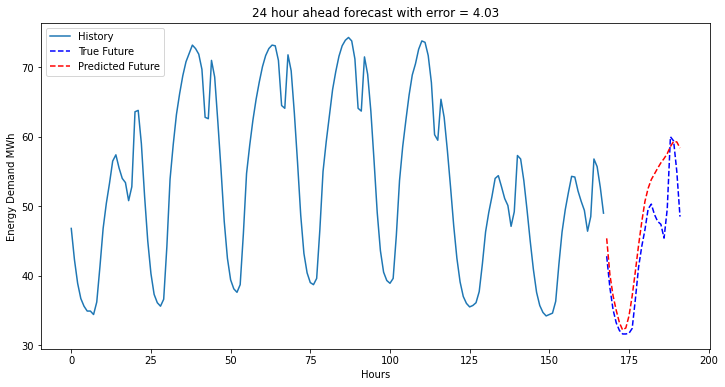

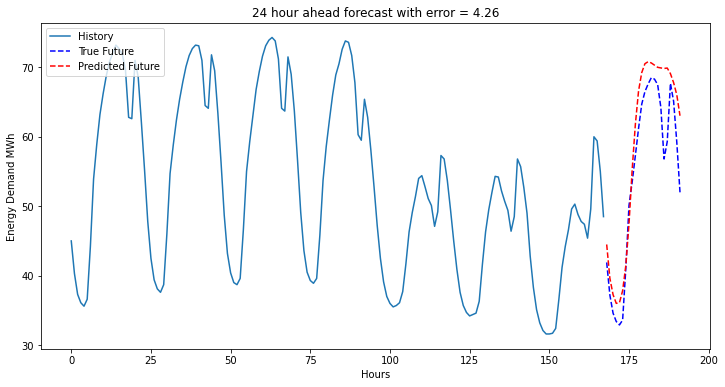

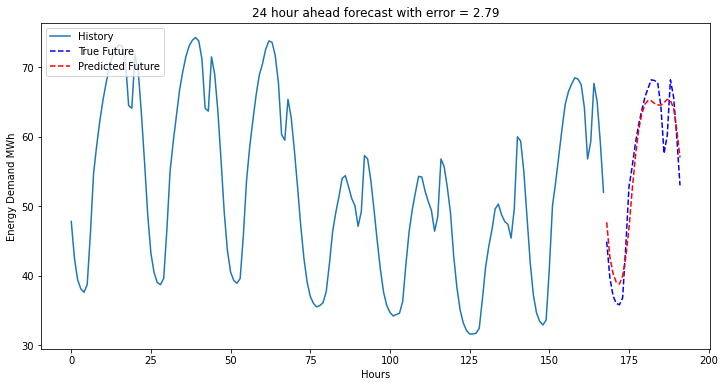

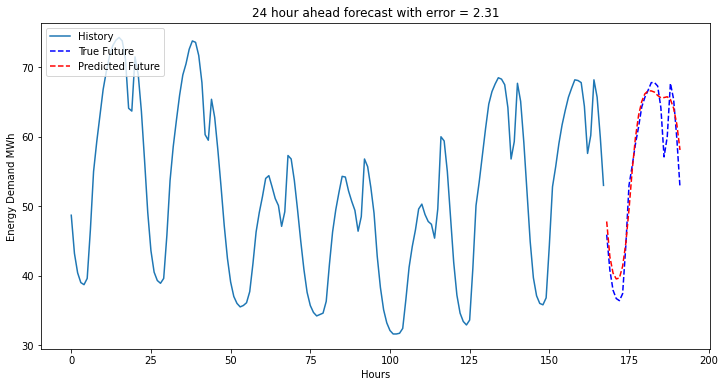

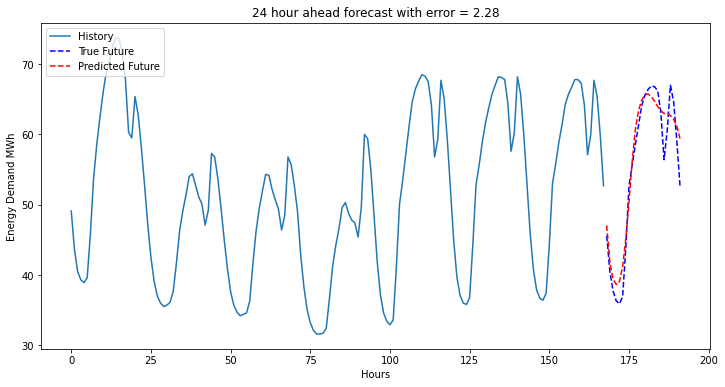

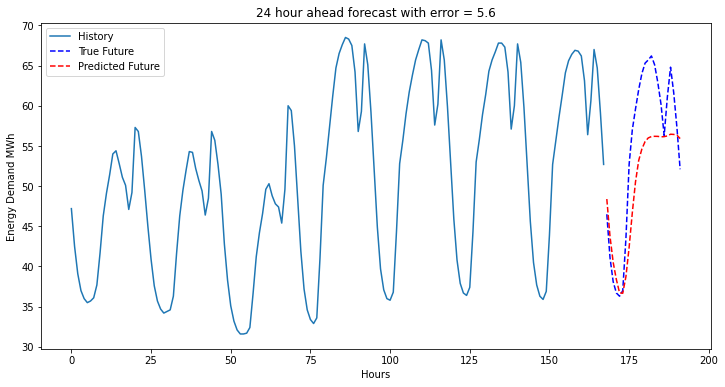

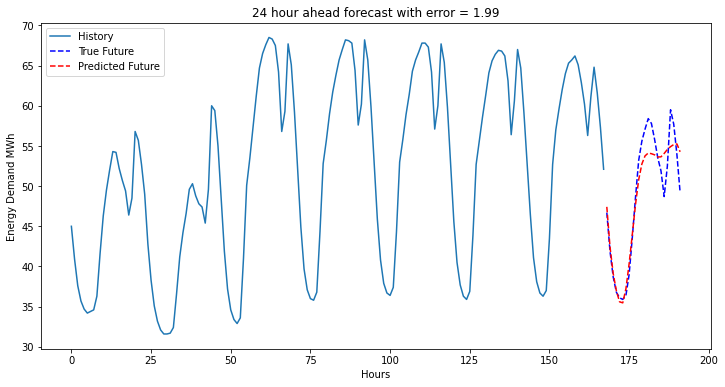

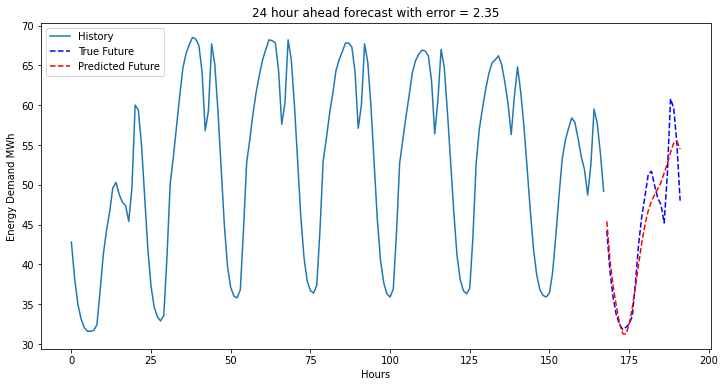

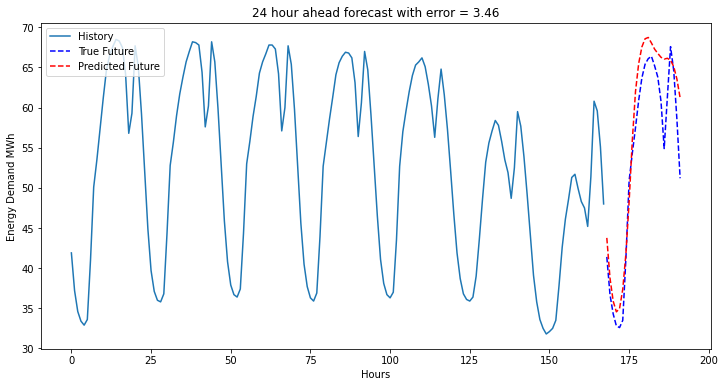

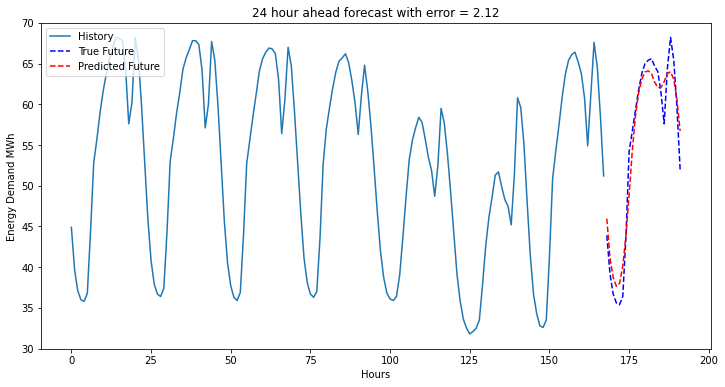

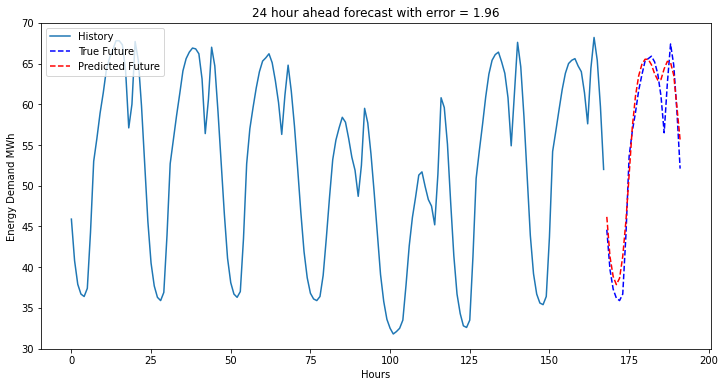

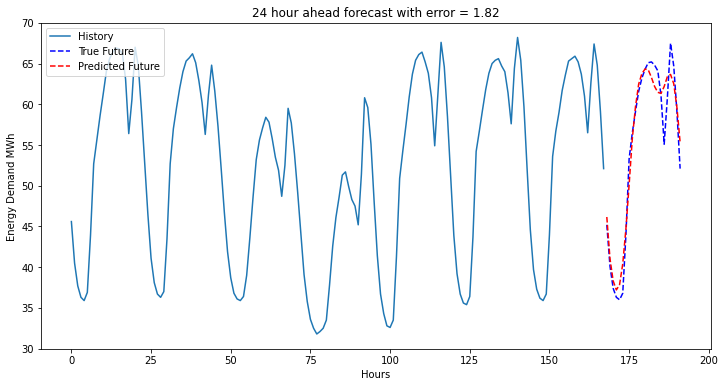

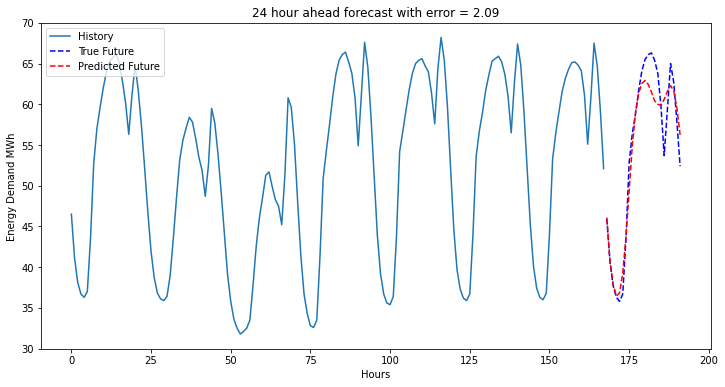

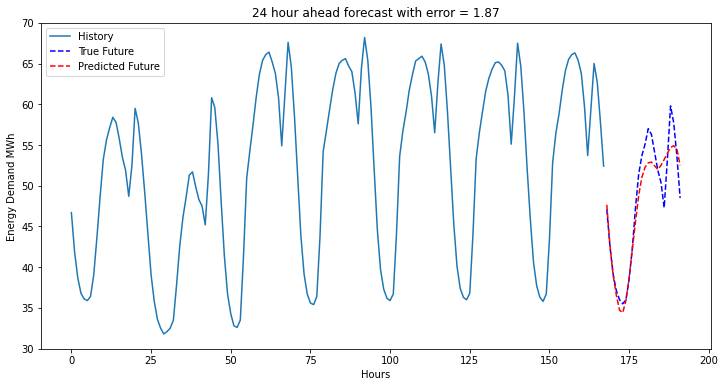

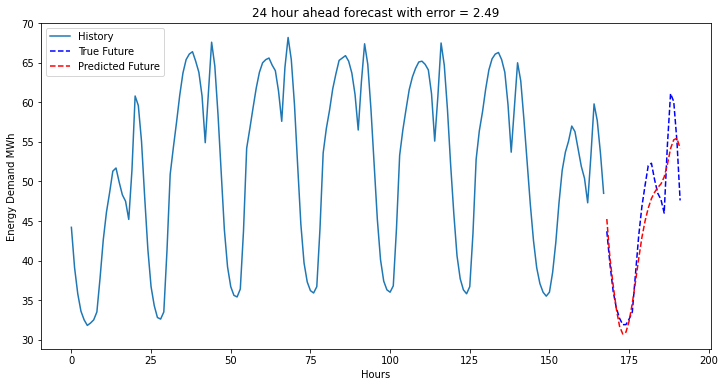

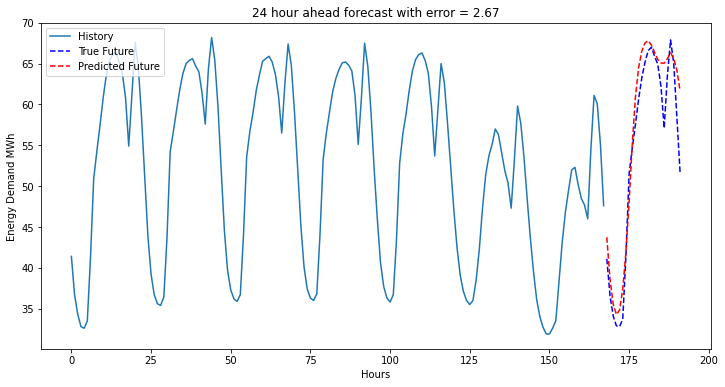

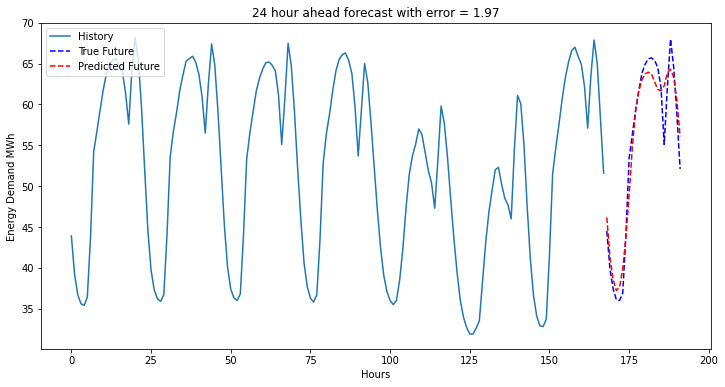

In [9]:
from plot_results import multi_step_plot
for i in range(50, 100):
    plt = multi_step_plot(input_test[24*i] * std + mean, output_test[24*i] * std + mean, pred[24*i])
    plt.show()

In [ ]:
model.save("models/best_wind_forecast_3.h5")

In [10]:
import pandas as pd

df = pd.read_json("history.json")

<AxesSubplot:>

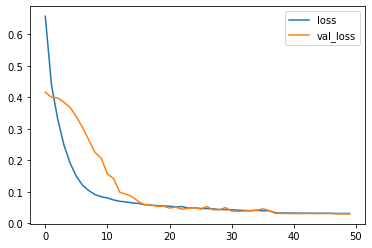

In [11]:
df[["loss", "val_loss"]].plot()